In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np

Analiza, którą przeprowadzę będzie analizą eksploracyjną. Ma na celu pokazanie jakie zmienne zależne i niezależne mogą wpłynąć na marskość wątroby.
Następnie przeprowadzę proces uczenia maszynowego w formie regresji logistycznej, aby móc przewidzieć czy posiadając dane cechy możemy mówić o
posiadaniu tej choroby.
Link do danych: https://www.kaggle.com/datasets/fatemehmehrparvar/liver-disorders

In [6]:
df = pd.read_csv(r'C:\Users\48797\Documents\ProjektyPython\Analiza+UczenieMaszynoweChorobyWątrtoby\Indian Liver Patient Dataset (ILPD).csv')

In [ ]:
Sprawdzam czy baza danych nie posiada wartości pustych, skrajnych.

In [12]:
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
df = df.dropna()

In [30]:
df.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Zmieniam wartość płci z stringa na wartość liczbową.

In [17]:
df['Gender'] = (df['Gender'] == 'Male').astype(int)

Teraz zwizualizuję zmienne niezależne.

<Axes: xlabel='Age', ylabel='Count'>

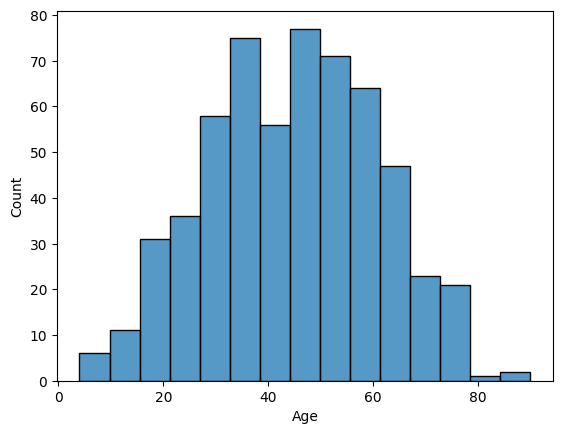

In [20]:
sns.histplot(data = df, x = 'Age')

<Axes: xlabel='Count', ylabel='Gender'>

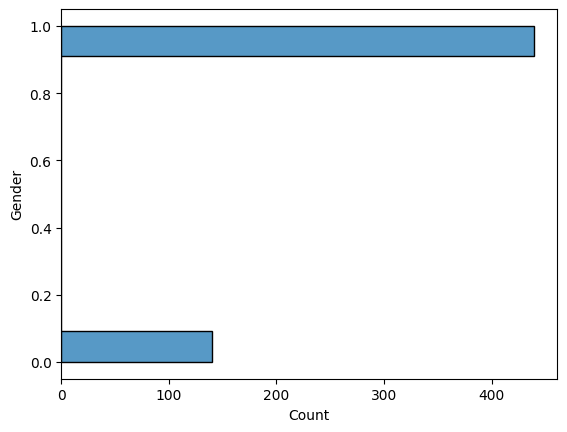

In [26]:
sns.histplot(data = df, y =  'Gender')

<Axes: xlabel='Selector', ylabel='Count'>

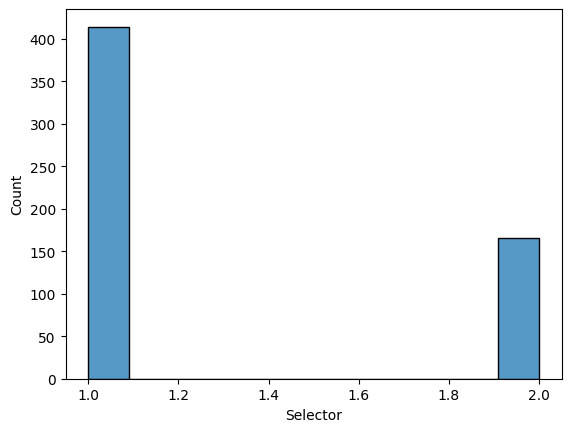

In [28]:
sns.histplot(data = df, x = 'Selector')

W zbiorze danych wiek jest rozłożony normalnie, natomiast w strukturze płci dominują mężczyźni, a w strukturze zachorowań na marskość osoby chore.

In [29]:
df.corr()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
Age,1.000000,0.055881,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
Gender,0.055881,1.000000,0.088068,0.099160,-0.029368,0.081339,0.079421,-0.095149,-0.095579,-0.003424,-0.081349
TB,0.011000,0.088068,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
DB,0.006784,0.099160,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
Alkphos,0.078878,-0.029368,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
Sgpt,-0.087799,0.081339,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
Sgot,-0.020499,0.079421,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
TP,-0.186248,-0.095149,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
ALB,-0.264211,-0.095579,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
A/G Ratio,-0.216408,-0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131


Istnieje słaba korelacja między marskością wątroby a czynnikami takimi jak bilirubina we krwi(całkowita i właściwa bilirubina)

Teraz przeprowadzę regresje logistyczną mającą na celu predykcje marskości wątroby.

In [32]:
df.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'A/G Ratio', 'Selector'],
      dtype='object')

In [39]:
X= df[['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB','A/G Ratio']]
y = df['Selector']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
logreg = LogisticRegression(random_state=15, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[102,   5],
       [ 29,   9]], dtype=int64)

In [40]:
print(f'Skuteczność regresjii logistycznej wynosi {(102+9)/(102+5+29+9)} %')

Skuteczność regresjii logistycznej wynosi 0.7655172413793103 %


Przewidywanie posiadania marskości
Wpisz po kolei Wiek, Płeć(1 dla mężczyzny), Poziom całkowitej bilitrubiny, bilirubiny właściwej,Alkphos (Alkaline Phosphatase) ,SGPT (Alanine Aminotransferase), SGOT,białko całkowite, (Aspartate Aminotransferase),A/G ratio


In [71]:
new_data = [[65, 0,0.7,0.1,187,16,18,6.8,3.3,0.90]]
predicted_class = logreg.predict(new_data)
predicted_class
if predicted_class == 1 :
    print('Z prawdopodobieństwem 76,5% masz marskość wątroby')
else :
    print('Z prawdopodobieństwem 76,5% nie masz marskości wątroby')

Z prawdopodobieństwem 76,5% masz marskość wątroby


C:\Users\48797\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
